
# Linear Regression of Red Wine  
### Suspected correlation between Quality and Alcohol  
  
Author: Sven Nivera  
Date: November 2021

PennyLane, special NumPy and MatPlot are imported:

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

.csv-sheet wich contains the data gets imported...  
The columns which contain the alcohol and quality values get isolated:

In [6]:
#Data import from .csv-file
wine_data = np.genfromtxt('winequality-red.csv', delimiter=';')

#First row which contains the column names must be deleted to use only the data itself
wine_data = np.delete(wine_data, 0, 0) 

#Data isolation
alcohol = np.array(wine_data[:,10])
quality = np.array(wine_data[:,11])

#print data to check it's correctnes
print(alcohol)
print(quality)

[ 9.4  9.8  9.8 ... 11.  10.2 11. ]
[5. 5. 5. ... 6. 5. 6.]


Linear Regression and optimizer getting initialized:

In [7]:
# y = ax + b
# y -> quality, x -> alcohol
a = 10.0
b = 0.0
stepsize = 0.001

#initialize weights and the optimizer
weights = [a, b]
opt = qml.GradientDescentOptimizer(stepsize)

Two functions for predicting quality values and calculating the cost function must be defined:

In [8]:
#funtion to predict quality value depending on the weights
def quality_prediction(weights):
    return weights[0] * alcohol + weights[1]

#function to calculate the cost (mean squared error)
def cost(weights):
    predicted_quality = quality_prediction(weights)
    mse = np.mean((quality - predicted_quality) ** 2) #Mean squared error gets calculated
    return mse

100 iterations getting executed. With every iteration the weights will be optimized a bit more:

C:\Users\Sven\anaconda3\envs\quantum\lib\site-packages\pennylane\_grad.py:95: UserWarning: Starting with PennyLane v0.20.0, when using Autograd, inputs have to explicitly specify requires_grad=True (or the argnum argument must be passed) in order for trainable parameters to be identified.
  warnings.warn(


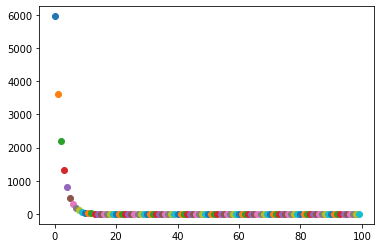

In [9]:
for i in range(100):
    weights = opt.step(cost, weights) #Optimizer optimizes the weights with every iteration
    
#Display options for further observations:
    #print(weights)
    #print(cost(weights))
    plt.scatter(i, cost(weights))    

The above graph visualizes how the mse gets optimized. It aproximates the ideal value ever more. A 6-Sigma aproximation should be absolutely enough!  
  
The original data and the calculated regression line is displayed and labeled in a graph:

Text(0.5, 0, 'Alcohol in %')

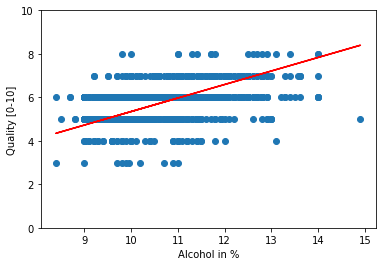

In [5]:
#Original data
plt.scatter(alcohol, quality)

#Regression line
plt.plot(alcohol, quality_prediction(weights), 'r')

#Data range and labeling
plt.ylim([0, 10])
plt.ylabel('Quality [0-10]')
plt.xlabel('Alcohol in %')

As the above graph visualizes our assumption of a linear correlation seems to be true.  
It is important to note, that the regression line will only deliver a meaningfull value within the given data range!